In [16]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from utils import *

In [2]:
df = pd.read_pickle('../data/highered_cleaned.pkl')
data_dict = pd.read_pickle('../data/data_dictionary.pkl')

## Understanding The Data

In [3]:
df.shape

(119153, 23)

In [4]:
df.columns

Index(['YEAR', 'NMRMEMG', 'HRSWKGR', 'WKSWKGR', 'OCEDRLP', 'EMSEC', 'EMSIZE',
       'GOVSUP', 'ACTCAP', 'ACTDED', 'ACTMGT', 'ACTRD', 'ACTRDT', 'ACTRES',
       'ACTTCH', 'WADEV', 'WADSN', 'WAEMRL', 'WAMGMT', 'WAOT', 'WAPROD',
       'SALARY', 'JOBSATIS'],
      dtype='object')

We want to see what the columns in the dataframe mean, and what values they have. We will use our data dictionary to do this.

In [5]:
for col in df.columns:
    print(f'{col}: {data_dict[col]["var_desc_short"]} ({data_dict[col]["data_values"]})')

YEAR: Survey year ({})
NMRMEMG: Field of study of major for most recent degree (major group) ({1: 'Computer and math sciences', 2: 'Life and related sciences', 3: 'Physical and related sciences', 4: 'Social and related sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields', 9: 'Other categories', 99: 'Missing'})
HRSWKGR: Principal job: hours per week typically worked (group) ({1: '20 or less', 2: '21 - 35', 3: '36 - 40', 4: 'Greater than 40', 98: 'Logical Skip'})
WKSWKGR: Principal job weeks salary based on year (group) ({1: '1-10 weeks', 2: '11-20 weeks', 3: '21-39 weeks', 4: '40-52 weeks', 98: 'Logical Skip'})
OCEDRLP: Principal job related to highest degree ({1: 'Closely related', 2: 'Somewhat related', 3: 'Not related', 98: 'Logical Skip'})
EMSEC: Employer sector ({1: '2 year college or other school system', 2: '4 year college or medical institution', 3: 'Government', 4: 'Business or industry', 5: 'Non-US government', 98: '

## Correlations of Features

In [6]:
corr = df.corr()
corr.style.background_gradient('coolwarm')

,YEAR,NMRMEMG,HRSWKGR,WKSWKGR,OCEDRLP,EMSEC,EMSIZE,GOVSUP,ACTCAP,ACTDED,ACTMGT,ACTRD,ACTRDT,ACTRES,ACTTCH,WADEV,WADSN,WAEMRL,WAMGMT,WAOT,WAPROD,SALARY,JOBSATIS
YEAR,1.000000,0.006998,-0.032079,0.013484,-0.007923,0.010623,0.006075,-0.002683,-0.002064,-0.001578,-0.007086,-0.002057,0.003913,-0.000137,-0.017297,0.013419,0.032258,-0.029849,0.008687,0.051696,0.016509,0.126447,0.024054
NMRMEMG,0.006998,1.000000,-0.054799,-0.009575,-0.043225,0.064217,-0.074581,-0.090008,-0.044564,0.080433,0.007252,-0.060786,-0.054447,-0.108374,0.015275,0.077097,0.083639,0.018050,-0.007767,0.013196,-0.014731,0.025518,-0.011618
HRSWKGR,-0.032079,-0.054799,1.000000,0.113336,-0.060319,-0.138168,0.277005,0.128729,-0.028350,0.002280,0.081113,0.165593,0.126802,0.153226,0.040474,0.063975,0.076218,0.147187,0.267545,0.016312,0.052312,0.336737,0.000015
WKSWKGR,0.013484,-0.009575,0.113336,1.000000,0.121455,0.263378,-0.072944,-0.001400,0.077736,0.127059,0.129370,-0.000732,-0.130680,-0.059375,-0.333016,0.128221,0.099651,0.047527,0.069550,-0.054456,0.072017,0.205446,0.020646
OCEDRLP,-0.007923,-0.043225,-0.060319,0.121455,1.000000,0.313593,-0.145334,-0.111980,0.156175,0.104303,0.168872,-0.181404,-0.285704,-0.255004,-0.268137,0.058244,0.071403,0.033394,-0.002082,-0.003740,0.064450,0.059392,0.114735
EMSEC,0.010623,0.064217,-0.138168,0.263378,0.313593,1.000000,-0.496017,-0.235852,0.167074,0.376113,0.190010,-0.087856,-0.330410,-0.279425,-0.591467,0.336011,0.250593,-0.005882,-0.024502,-0.081911,0.123170,0.263368,0.016759
EMSIZE,0.006075,-0.074581,0.277005,-0.072944,-0.145334,-0.496017,1.000000,0.163866,-0.020922,-0.056377,-0.101512,0.226853,0.316990,0.256072,0.242887,-0.032613,-0.003708,0.031088,0.111873,0.029027,-0.023399,0.069811,0.066846
GOVSUP,-0.002683,-0.090008,0.128729,-0.001400,-0.111980,-0.235852,0.163866,1.000000,-0.013461,-0.079433,-0.033850,0.246532,0.182360,0.296503,-0.036469,-0.034439,0.035309,0.041152,0.140463,-0.031949,-0.013096,0.007129,-0.027988
ACTCAP,-0.002064,-0.044564,-0.028350,0.077736,0.156175,0.167074,-0.020922,-0.013461,1.000000,0.067892,-0.134531,-0.010402,-0.064923,-0.109980,-0.173766,0.074842,0.137946,-0.091332,-0.133057,-0.073275,-0.001917,0.043416,0.052300
ACTDED,-0.001578,0.080433,0.002280,0.127059,0.104303,0.376113,-0.056377,-0.079433,0.067892,1.000000,-0.120276,0.358688,0.258934,-0.146744,-0.306136,0.570396,0.464361,-0.055312,-0.021034,-0.097832,0.143264,0.155688,0.060777


In [7]:
# sorting by highest correlations to our target variable, EMSEC
correlations = corr['EMSEC'].sort_values(ascending=False)
correlations

EMSEC       1.000000
ACTDED      0.376113
WADEV       0.336011
OCEDRLP     0.313593
WKSWKGR     0.263378
SALARY      0.263368
WADSN       0.250593
ACTMGT      0.190010
ACTCAP      0.167074
WAPROD      0.123170
NMRMEMG     0.064217
JOBSATIS    0.016759
YEAR        0.010623
WAEMRL     -0.005882
WAMGMT     -0.024502
WAOT       -0.081911
ACTRD      -0.087856
HRSWKGR    -0.138168
GOVSUP     -0.235852
ACTRES     -0.279425
ACTRDT     -0.330410
EMSIZE     -0.496017
ACTTCH     -0.591467
Name: EMSEC, dtype: float64

/var/folders/n9/3mjn__fd1xd66lc1zh9nlj0h0000gp/T/ipykernel_81685/1711106592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


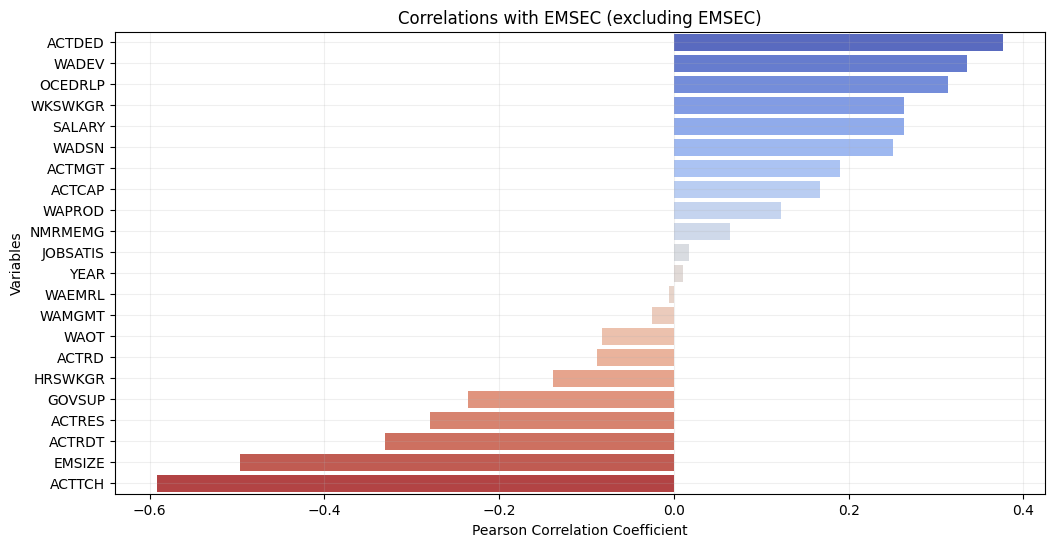

In [8]:
# Exclude 'EMSEC' from the plot
correlations = correlations[correlations.index != 'EMSEC']

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlations with EMSEC (excluding EMSEC)')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(alpha=0.2)
plt.show()

## Machine Learning Algorithms

In [9]:
# defining features and target columns
X = df.drop('EMSEC', axis=1)
y = df['EMSEC']

In [10]:
# splitting data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In the literature, CART decision trees (Birzniece et al., 2022), kNN and SVM (Zebari et al., 2020), and XGBoost (Sheetal et al., 2022) algorithms have been used for supervised classification to answer related questions to ours. To re-iterate, the research questions is 'Can we predict which PhD holders will work in academia or industry? And what are their characteristics?'. This is a binary classification problem, so we will use relevant algorithms to build a binary prediction model, evaluate the performances, and extract the features of each class. We need to be mindful of the strengths and limitations of these algorithms also.

In [11]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           2       0.87      0.88      0.88     12293
           4       0.87      0.86      0.87     11538

    accuracy                           0.87     23831
   macro avg       0.87      0.87      0.87     23831
weighted avg       0.87      0.87      0.87     23831


Confusion Matrix:
[[10789  1504]
 [ 1561  9977]]


In [13]:
clf.classes_

array([2, 4])

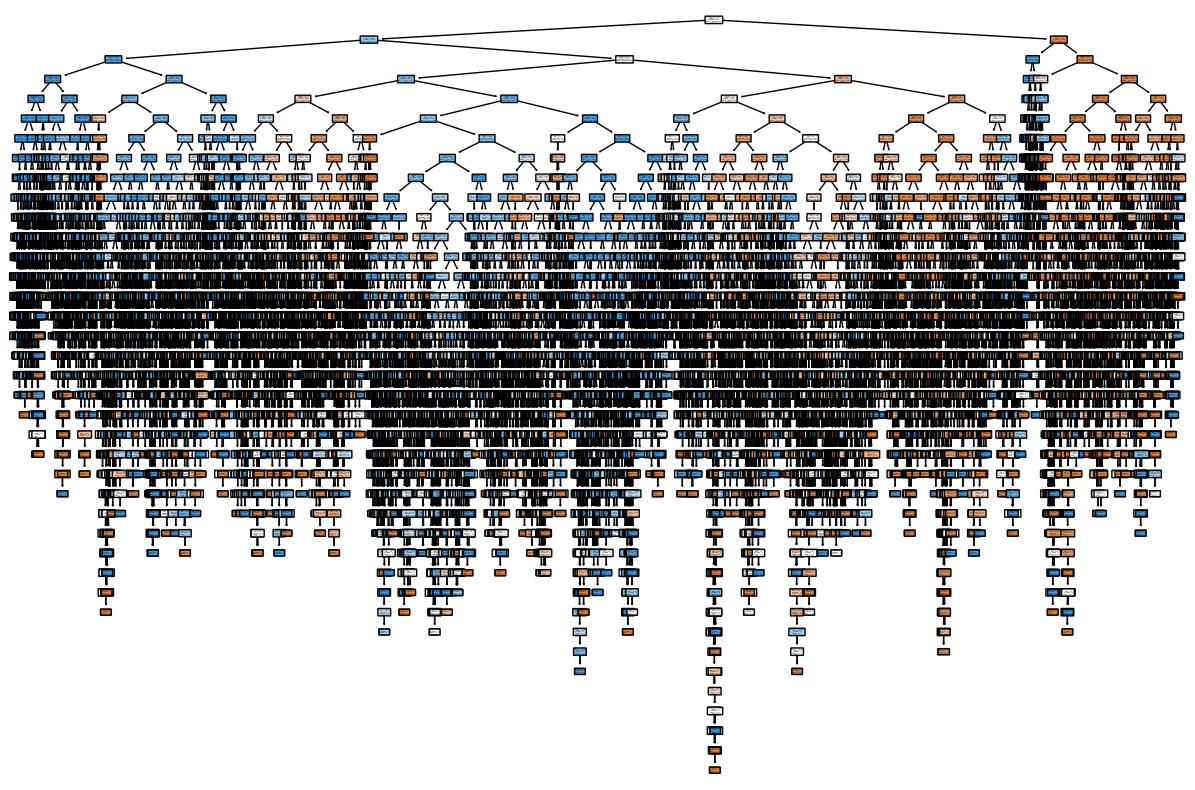

In [14]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_.astype(str), filled=True, rounded=True)
plt.show()

In [17]:
# Create SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')